#### Convolution Neural network CNN for learning images and processing - using high-level Keras preprocessing utilities and layers to read a directory of images on disk.


#### deep_learn2.ipynb - was run for 1 year images.

In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
import numpy as np
import pandas as pd
import os
import os.path
import PIL
from PIL import Image
import PIL.Image
import tensorflow as tf
#import tensorflow_datasets as tfds
from tensorflow import keras
from tensorflow.keras import layers
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score
import datetime

In [3]:
print(tf.__version__)

2.5.0


#### Dataset - directory
candlesticks_together

##### Define path for dataset

In [4]:
import pathlib
image_dir = pathlib.Path('candlesticks_together/')
#data_test_dir = pathlib.Path('candlesticks_test')

### Create File DataFrame

In [5]:
filepaths = pd.Series(list(image_dir.glob(r'**/*.png')), name='Filepath').astype(str)

In [6]:
filepaths

0     candlesticks_together\2020-07-12.png
1     candlesticks_together\2020-07-19.png
2     candlesticks_together\2020-07-26.png
3     candlesticks_together\2020-08-02.png
4     candlesticks_together\2020-08-09.png
5     candlesticks_together\2020-08-16.png
6     candlesticks_together\2020-08-23.png
7     candlesticks_together\2020-08-30.png
8     candlesticks_together\2020-09-06.png
9     candlesticks_together\2020-09-13.png
10    candlesticks_together\2020-09-20.png
11    candlesticks_together\2020-09-27.png
12    candlesticks_together\2020-10-04.png
13    candlesticks_together\2020-10-11.png
14    candlesticks_together\2020-10-18.png
15    candlesticks_together\2020-10-25.png
16    candlesticks_together\2020-11-01.png
17    candlesticks_together\2020-11-08.png
18    candlesticks_together\2020-11-15.png
19    candlesticks_together\2020-11-22.png
20    candlesticks_together\2020-11-29.png
21    candlesticks_together\2020-12-06.png
22    candlesticks_together\2020-12-13.png
23    candl

In [7]:
signal_df = pd.read_csv('signal.csv')  

In [8]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52 entries, 0 to 51
Data columns (total 2 columns):
Date      52 non-null object
Signal    52 non-null int64
dtypes: int64(1), object(1)
memory usage: 912.0+ bytes


In [9]:
signal_df['Date']= pd.to_datetime(signal_df['Date'])

In [10]:
signal_df.set_index('Date', inplace = True)

In [11]:
signal_df.head()

,Signal
Date,
2020-07-12,0
2020-07-19,1
2020-07-26,1
2020-08-02,1
2020-08-09,1


In [12]:
signal_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 52 entries, 2020-07-12 to 2021-07-04
Data columns (total 1 columns):
Signal    52 non-null int64
dtypes: int64(1)
memory usage: 832.0 bytes


In [13]:
filepaths[0]

'candlesticks_together\\2020-07-12.png'

In [14]:
date_list = []
for i in filepaths:
    #print(i)
    dtstr = os.path.split(i)[1].split(".")[0]
    #print(dtstr)
    #print(datetime.datetime.strptime(dtstr, '%Y-%m-%d').date())
    date_list.append(datetime.datetime.strptime(dtstr, '%Y-%m-%d').date())
    

In [15]:
date_list

[datetime.date(2020, 7, 12),
 datetime.date(2020, 7, 19),
 datetime.date(2020, 7, 26),
 datetime.date(2020, 8, 2),
 datetime.date(2020, 8, 9),
 datetime.date(2020, 8, 16),
 datetime.date(2020, 8, 23),
 datetime.date(2020, 8, 30),
 datetime.date(2020, 9, 6),
 datetime.date(2020, 9, 13),
 datetime.date(2020, 9, 20),
 datetime.date(2020, 9, 27),
 datetime.date(2020, 10, 4),
 datetime.date(2020, 10, 11),
 datetime.date(2020, 10, 18),
 datetime.date(2020, 10, 25),
 datetime.date(2020, 11, 1),
 datetime.date(2020, 11, 8),
 datetime.date(2020, 11, 15),
 datetime.date(2020, 11, 22),
 datetime.date(2020, 11, 29),
 datetime.date(2020, 12, 6),
 datetime.date(2020, 12, 13),
 datetime.date(2020, 12, 20),
 datetime.date(2020, 12, 27),
 datetime.date(2021, 1, 3),
 datetime.date(2021, 1, 10),
 datetime.date(2021, 1, 17),
 datetime.date(2021, 1, 24),
 datetime.date(2021, 1, 31),
 datetime.date(2021, 2, 7),
 datetime.date(2021, 2, 14),
 datetime.date(2021, 2, 21),
 datetime.date(2021, 2, 28),
 datetime.

In [16]:
fn = datetime.datetime.strptime(os.path.split(filepaths[0])[1].split(".")[0], '%Y-%m-%d').date()

In [17]:
fn

datetime.date(2020, 7, 12)

In [18]:
filename = os.path.split(filepaths[0])[1]

In [19]:
filename

'2020-07-12.png'

In [20]:
parts = filename.split(".")

In [21]:
parts[0]

'2020-07-12'

In [22]:
image_date=datetime.datetime.strptime(parts[0], '%Y-%m-%d').date()

In [23]:
image_date

datetime.date(2020, 7, 12)

In [24]:
type(image_date)

datetime.date

In [25]:
images_df = pd.DataFrame()
images_df['Date'] = date_list 
images_df['Filepath'] =  filepaths

In [26]:
images_df['Date']= pd.to_datetime(images_df['Date'])

In [27]:
images_df.head()

,Date,Filepath
0,2020-07-12,candlesticks_together\2020-07-12.png
1,2020-07-19,candlesticks_together\2020-07-19.png
2,2020-07-26,candlesticks_together\2020-07-26.png
3,2020-08-02,candlesticks_together\2020-08-02.png
4,2020-08-09,candlesticks_together\2020-08-09.png


In [28]:
images_df.set_index('Date', inplace=True)

In [29]:
images_df.head()

,Filepath
Date,
2020-07-12,candlesticks_together\2020-07-12.png
2020-07-19,candlesticks_together\2020-07-19.png
2020-07-26,candlesticks_together\2020-07-26.png
2020-08-02,candlesticks_together\2020-08-02.png
2020-08-09,candlesticks_together\2020-08-09.png


In [30]:
images_df.index

DatetimeIndex(['2020-07-12', '2020-07-19', '2020-07-26', '2020-08-02',
               '2020-08-09', '2020-08-16', '2020-08-23', '2020-08-30',
               '2020-09-06', '2020-09-13', '2020-09-20', '2020-09-27',
               '2020-10-04', '2020-10-11', '2020-10-18', '2020-10-25',
               '2020-11-01', '2020-11-08', '2020-11-15', '2020-11-22',
               '2020-11-29', '2020-12-06', '2020-12-13', '2020-12-20',
               '2020-12-27', '2021-01-03', '2021-01-10', '2021-01-17',
               '2021-01-24', '2021-01-31', '2021-02-07', '2021-02-14',
               '2021-02-21', '2021-02-28', '2021-03-07', '2021-03-14',
               '2021-03-21', '2021-03-28', '2021-04-04', '2021-04-11',
               '2021-04-18', '2021-04-25', '2021-05-02', '2021-05-09',
               '2021-05-16', '2021-05-23', '2021-05-30', '2021-06-06',
               '2021-06-13', '2021-06-20', '2021-06-27', '2021-07-04'],
              dtype='datetime64[ns]', name='Date', freq=None)

In [31]:
images = pd.concat([images_df,signal_df], join='inner', axis=1)

In [32]:
images.head(10)

,Filepath,Signal
Date,,
2020-07-12,candlesticks_together\2020-07-12.png,0
2020-07-19,candlesticks_together\2020-07-19.png,1
2020-07-26,candlesticks_together\2020-07-26.png,1
2020-08-02,candlesticks_together\2020-08-02.png,1
2020-08-09,candlesticks_together\2020-08-09.png,1
2020-08-16,candlesticks_together\2020-08-16.png,0
2020-08-23,candlesticks_together\2020-08-23.png,1
2020-08-30,candlesticks_together\2020-08-30.png,1
2020-09-06,candlesticks_together\2020-09-06.png,0


In [33]:
# Let's only use 40 images to speed up training time
image_df = images.sample(40, random_state=1).reset_index(drop=True)
train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

In [34]:
train_df.head()

,Filepath,Signal
30,candlesticks_together\2020-10-18.png,0
36,candlesticks_together\2020-11-29.png,1
33,candlesticks_together\2021-05-30.png,0
28,candlesticks_together\2020-08-09.png,1
4,candlesticks_together\2021-02-07.png,1


In [35]:
test_df.head()

,Filepath,Signal
2,candlesticks_together\2021-05-02.png,1
31,candlesticks_together\2021-01-31.png,1
3,candlesticks_together\2021-02-21.png,0
21,candlesticks_together\2020-10-11.png,1
27,candlesticks_together\2020-12-20.png,1


### Loading Images

In [36]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [37]:
train_df

,Filepath,Signal
30,candlesticks_together\2020-10-18.png,0
36,candlesticks_together\2020-11-29.png,1
33,candlesticks_together\2021-05-30.png,0
28,candlesticks_together\2020-08-09.png,1
4,candlesticks_together\2021-02-07.png,1
14,candlesticks_together\2020-12-27.png,1
10,candlesticks_together\2020-09-20.png,1
35,candlesticks_together\2020-11-15.png,1
23,candlesticks_together\2021-01-10.png,0
24,candlesticks_together\2020-11-08.png,0


#### Create image generator
Keras ImageDataGenerator can work with dataframe of file names. Our train, validation and test dataframes contain file name in id column and ImageDataGenerator can understand id.

In [38]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Signal',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Signal',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Signal',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=False
)

Found 23 validated image filenames.
Found 5 validated image filenames.
Found 12 validated image filenames.


### Training

In [39]:
inputs = tf.keras.Input(shape=(120, 120, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=100,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/100
1/1 [==============================] - 2s 2s/step - loss: 0.6435 - val_loss: 0.5774
Epoch 2/100
1/1 [==============================] - 0s 320ms/step - loss: 0.6274 - val_loss: 0.5633
Epoch 3/100
1/1 [==============================] - 1s 852ms/step - loss: 0.6118 - val_loss: 0.5494
Epoch 4/100
1/1 [==============================] - 0s 463ms/step - loss: 0.5963 - val_loss: 0.5343
Epoch 5/100
1/1 [==============================] - 0s 378ms/step - loss: 0.5797 - val_loss: 0.5184
Epoch 6/100
1/1 [==============================] - 0s 386ms/step - loss: 0.5618 - val_loss: 0.5010
Epoch 7/100
1/1 [==============================] - 0s 382ms/step - loss: 0.5423 - val_loss: 0.4825
Epoch 8/100
1/1 [==============================] - 0s 328ms/step - loss: 0.5214 - val_loss: 0.4629
Epoch 9/100
1/1 [==============================] - 0s 347ms/step - loss: 0.4989 - val_loss: 0.4422
Epoch 10/100
1/1 [==============================] - 0s 325ms/step - loss: 0.4750 - val_loss: 0.4207
Epoch 11/100

### Results

In [40]:
predicted_signals = np.squeeze(model.predict(test_images))
true_signals = test_images.labels

rmse = np.sqrt(model.evaluate(test_images, verbose=0))
print("     Test RMSE: {:.5f}".format(rmse))

r2 = r2_score(true_signals, predicted_signals)
print("Test R^2 Score: {:.5f}".format(r2))

     Test RMSE: 0.44792
Test R^2 Score: -0.44452


In [41]:
null_rmse = np.sqrt(np.sum((true_signals - np.mean(true_signals))**2) / len(true_signals))
print("Null/Baseline Model Test RMSE: {:.5f}".format(null_rmse))

Null/Baseline Model Test RMSE: 0.37268


## We can see that our model is not even better than the null/baseline model (predict mean every time)!

In [42]:
true_signals

array([1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1], dtype=int64)

In [43]:
predicted_signals

array([0.5935192 , 0.5282484 , 0.5110016 , 0.6564819 , 0.52291375,
       0.6510692 , 0.5110799 , 0.65157324, 0.5873675 , 0.62662226,
       0.43999246, 0.63557464], dtype=float32)

In [44]:
len(true_signals)

12

In [45]:
len(predicted_signals)

12

In [46]:
final_predictions_df = pd.DataFrame()
final_predictions_df['Actual'] = true_signals
final_predictions_df['Predicted'] =  predicted_signals

In [47]:
final_predictions_df

,Actual,Predicted
0,1,0.593519
1,1,0.528248
2,0,0.511002
3,1,0.656482
4,1,0.522914
5,1,0.651069
6,1,0.511080
7,1,0.651573
8,0,0.587367
9,1,0.626622


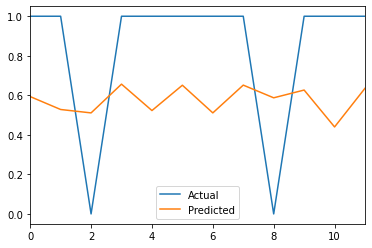

In [49]:
final_predictions_df.plot();